# <font color=blue><b>Omegalpes Tutorial</b></font><br>

<b>In this tutorial, you will learn how to write a simple program to simulate an energy system resembles this below figure

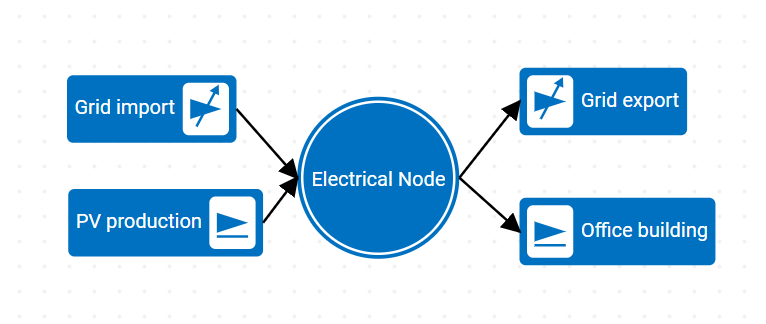<br>

As represented in the figure, we will create a model that represents this energy system in Omegalpes.<br>
<br>
The goal of this simulation is to determine whether the system has enough electricity to cover all the office consumption</b>

In [2]:
from Python_Script.OMEGAlpes_tutorial1 import *

<b>This is a line to import python code to jupyter notebook</b>

<b>These are lines in the pyton code to import all required packages to run the program</b>

<b>This is typical line in python program to run "main" program functions</b>

## <font color=blue><b>Step 1 Create time period</b></font><br>

In [ ]:
    time = TimeUnit(periods=24*1, dt=1)

## <font color=blue><b>Step 2 Create an empty model</b></font><br>

In [ ]:
 model = OptimisationModel(time=time,
                          name='tutorial')

## <font color=blue><b>Step 3 Create consumption units</b></font><br>

In [ ]:
    CONSUMPTION_PROFILE = open("data/Building_consumption_day.txt", "r")
    building_cons_file = [p for p in map(float, CONSUMPTION_PROFILE)]
    building_consumption = \
        FixedConsumptionUnit(time, 'building_consumption',
                         p=building_cons_file,
                         energy_type=elec)

## <font color=blue><b>Step 4 Create production units</b></font><br>

In [ ]:
    pv_production_file = open("data/pv_production_hourly2.csv",
                            "r")
    pv_production_daily = [p for p in map(float, pv_production_file)]

In [ ]:
    pv_production = FixedProductionUnit(
        time, name='pv_production', p=pv_production_daily ,
        energy_type=elec)
    grid_import = VariableProductionUnit(time, 'grid_import',
                                             energy_type=elec,
                                             p_min=0)
    grid_export = VariableConsumptionUnit(time, 'grid_export',
                                               energy_type=elec,
                                               p_min=0)

## <font color=blue><b>Step 5 Define the objective of the model</b></font><br>

In [ ]:
grid_import.minimize_production()

## <font color=blue><b>Step 6 Create energy nodes and connect the nodes</b></font><br>

In [ ]:
    elec_node = EnergyNode(time, name="elec_node",
                       energy_type=elec)
    elec_node.connect_units(grid_import, grid_export, pv_production,building_consumption)

## <font color=blue><b>Step 7 Add nodes to the empty model</b></font><br>

In [ ]:
    model.add_nodes(elec_node)

## <font color=blue><b>Step 8 Launch the optimization</b></font><br>

<b>This is a function to create an optimization file</b>

In [ ]:
model.solve_and_update()

## <font color=blue><b>Step 9 Processing the results</b></font><br>

In [ ]:
    plot_node_energetic_flows(elec_node)
    plt.show()

<b>This is a function to create an optimization file</b>

<b>This is a function to create an optimization file</b>